<a href="https://colab.research.google.com/github/MerinPaulK1602/Mace-mcalab/blob/main/CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing



In [3]:
df = pd.read_csv('/content/drive/MyDrive/miniproject/dataset/Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
df.shape

(10000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [11]:
df.duplicated().sum()

0

In [12]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

**data encoding**

In [13]:
encoder = preprocessing.LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])
df["Geography"] = encoder.fit_transform(df["Geography"])

In [14]:
import numpy as np
from scipy import stats

# Calculate z-scores for numerical features
z_scores = np.abs(stats.zscore(df.select_dtypes(include=['int64'])))

# Set the outlier threshold
outlier_threshold = 3  # You can adjust this threshold as needed

# Identify rows with outliers
outliers = (z_scores > outlier_threshold).any(axis=1)

# Remove outliers
df_no_outliers = df[~outliers]

# Save the cleaned data to a new CSV file
df_no_outliers.to_csv("no_outliers.csv", index=False)


In [15]:
print(df_no_outliers)

      RowNumber  CustomerId    Surname  CreditScore  Geography  Gender  Age  \
0             1    15634602   Hargrave          619          0       0   42   
1             2    15647311       Hill          608          2       0   41   
2             3    15619304       Onio          502          0       0   42   
3             4    15701354       Boni          699          0       0   39   
4             5    15737888   Mitchell          850          2       0   43   
...         ...         ...        ...          ...        ...     ...  ...   
9995       9996    15606229   Obijiaku          771          0       1   39   
9996       9997    15569892  Johnstone          516          0       1   35   
9997       9998    15584532        Liu          709          0       0   36   
9998       9999    15682355  Sabbatini          772          1       1   42   
9999      10000    15628319     Walker          792          0       0   28   

      Tenure    Balance  NumOfProducts  HasCrCard  

In [16]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


**Box plot**

<Axes: >

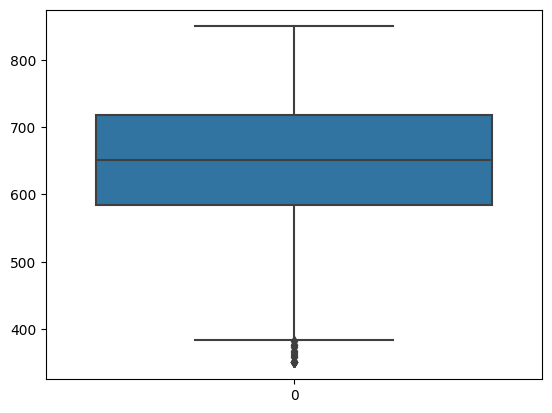

In [17]:
sns.boxplot(df["CreditScore"])

<Axes: >

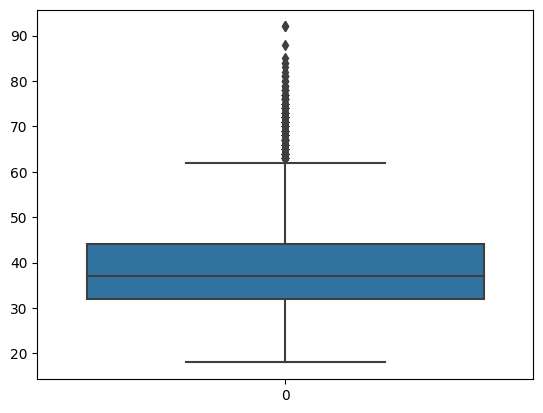

In [18]:
sns.boxplot(df["Age"])

<Axes: >

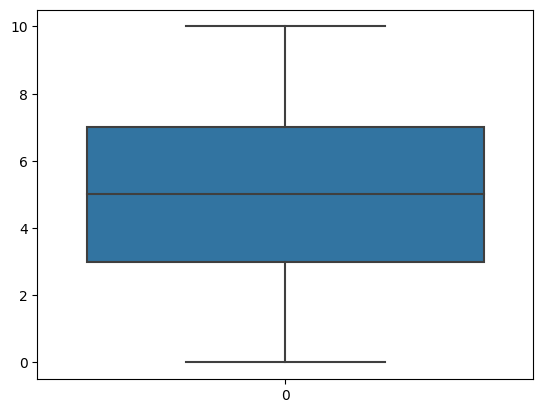

In [19]:
sns.boxplot(df["Tenure"])

<Axes: >

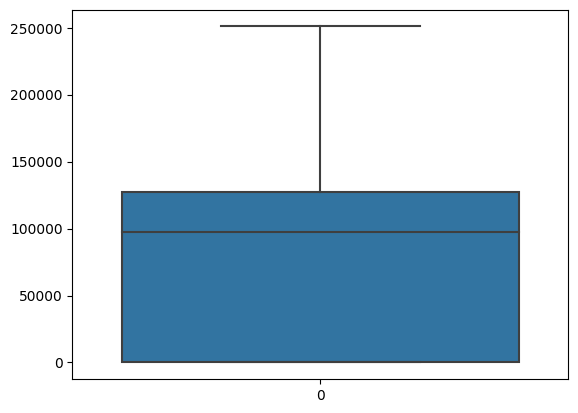

In [20]:
sns.boxplot(df["Balance"])

<Axes: >

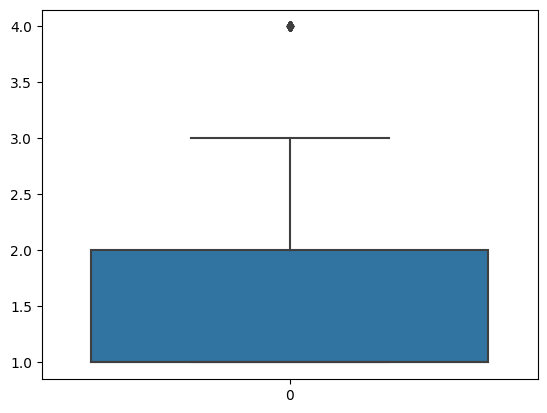

In [21]:
sns.boxplot(df["NumOfProducts"])

<Axes: >

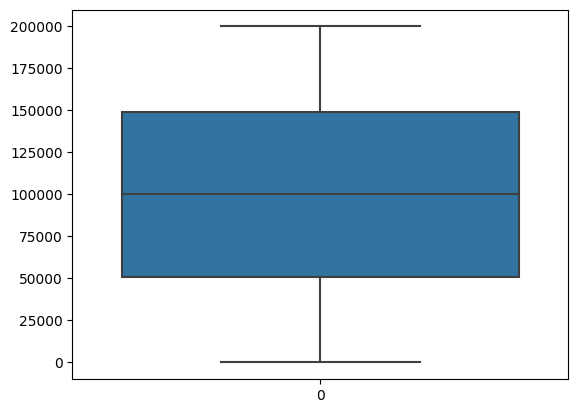

In [22]:
sns.boxplot(df["EstimatedSalary"])

**Box plot**

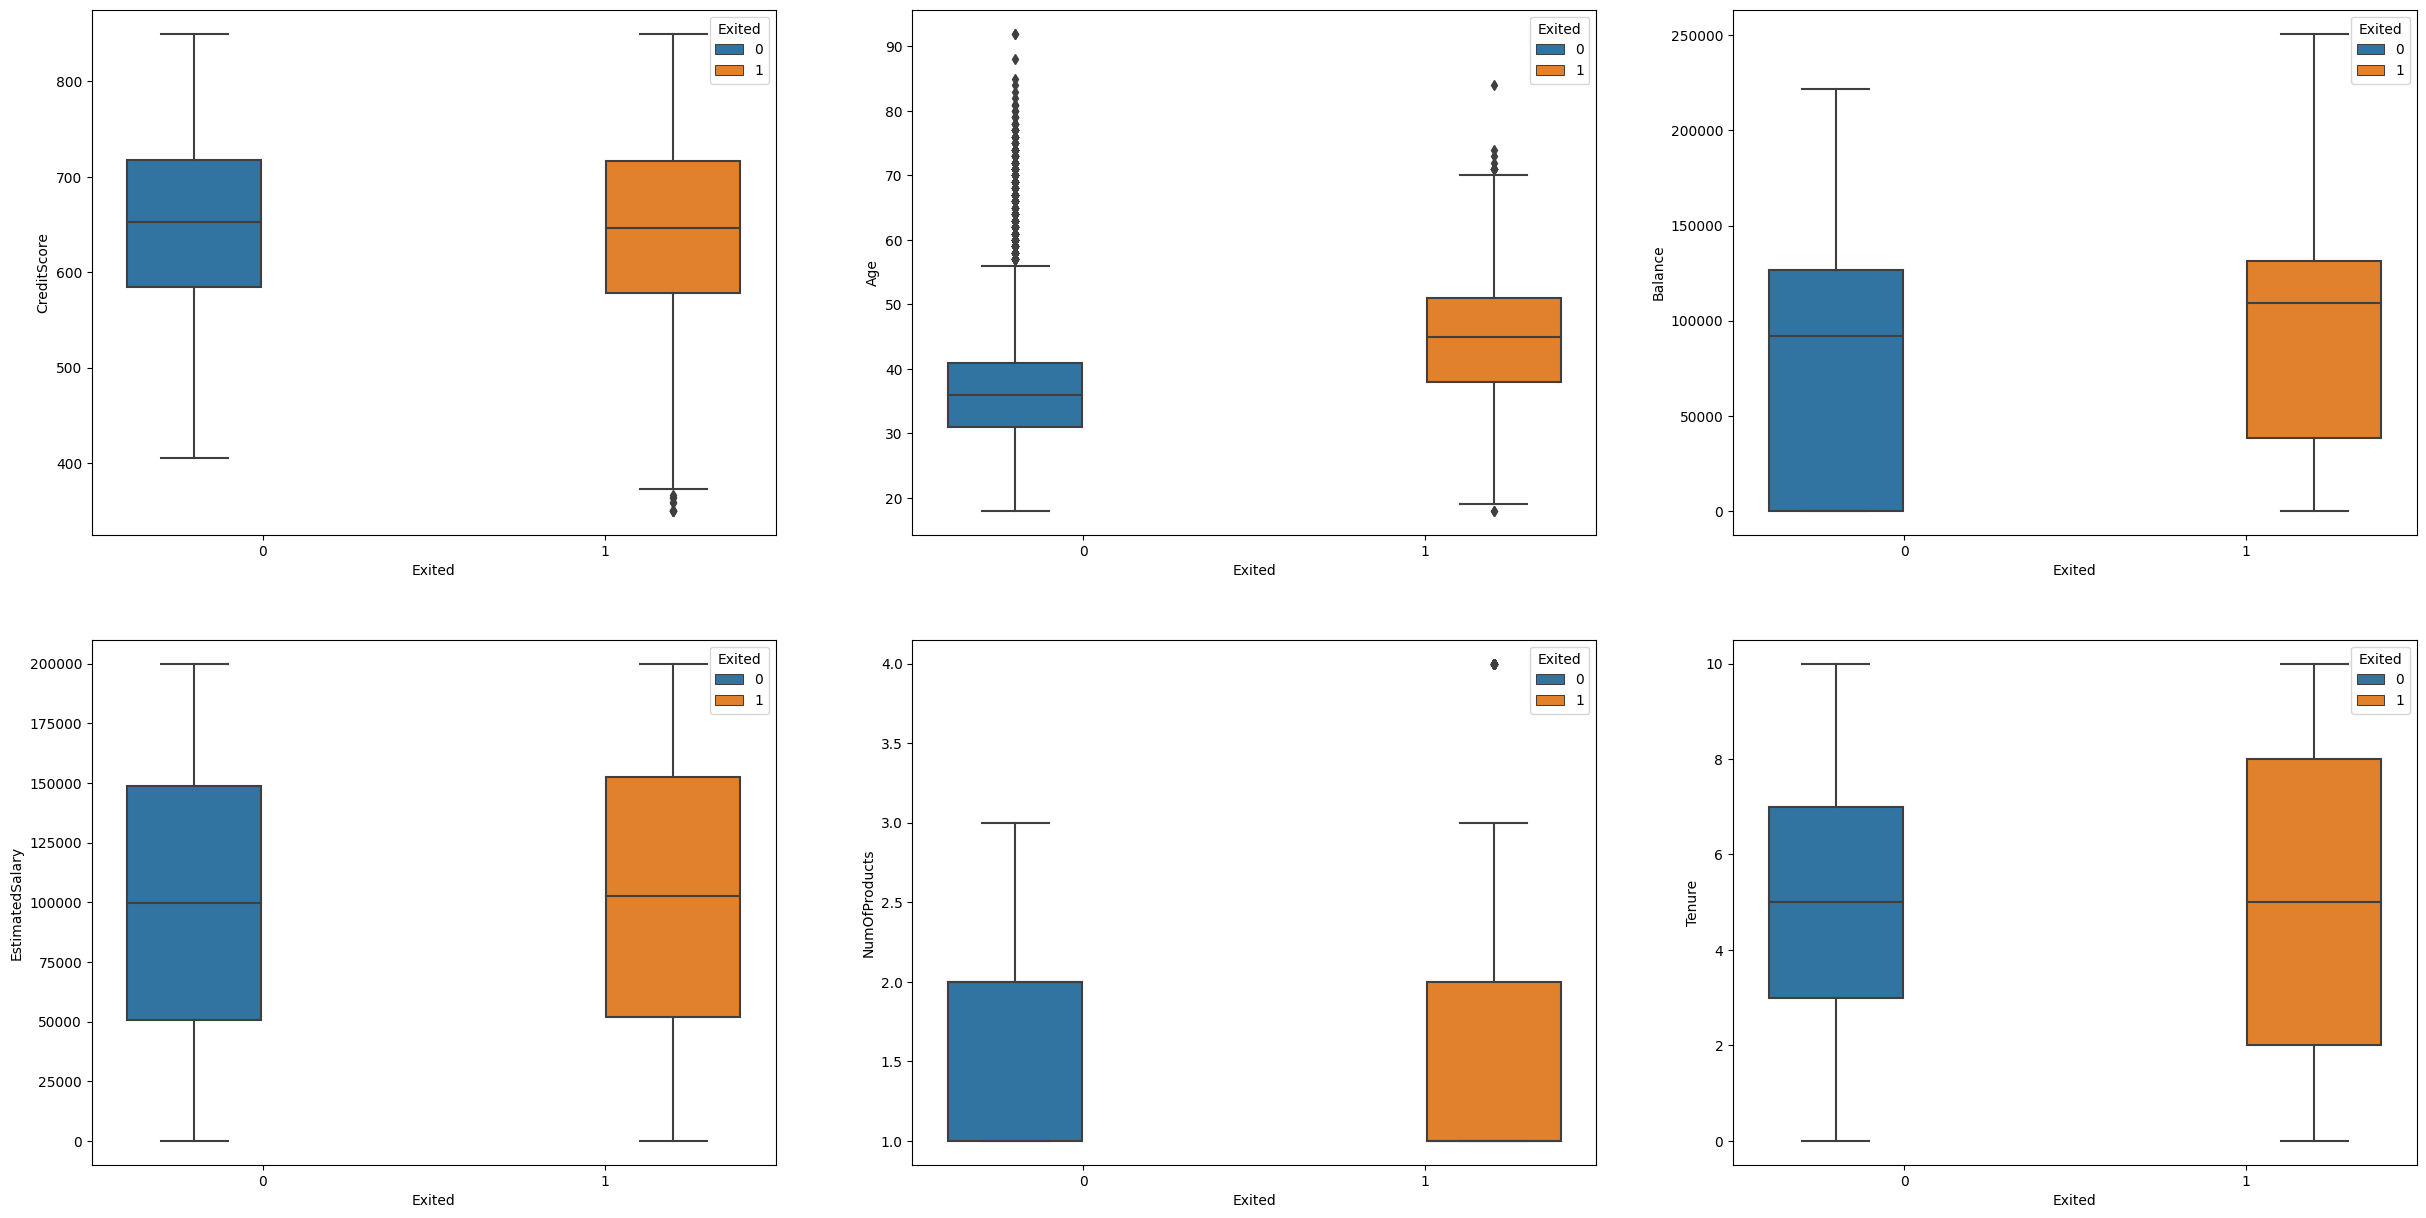

In [23]:

fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.boxplot(data=df, x='Exited', y='CreditScore', hue='Exited', ax=ax[0][0])
sns.boxplot(data=df, x='Exited', y='Age', hue='Exited', ax=ax[0][1])
sns.boxplot(data=df, x='Exited', y='Balance', hue='Exited', ax=ax[0][2])
sns.boxplot(data=df, x='Exited', y='EstimatedSalary', hue='Exited', ax=ax[1][0])
sns.boxplot(data=df, x='Exited', y='NumOfProducts', hue='Exited', ax=ax[1][1])
sns.boxplot(data=df, x='Exited', y='Tenure', hue='Exited', ax=ax[1][2])

plt.show()

**Distribution plot**

<ipython-input-24-cf0334540b62>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

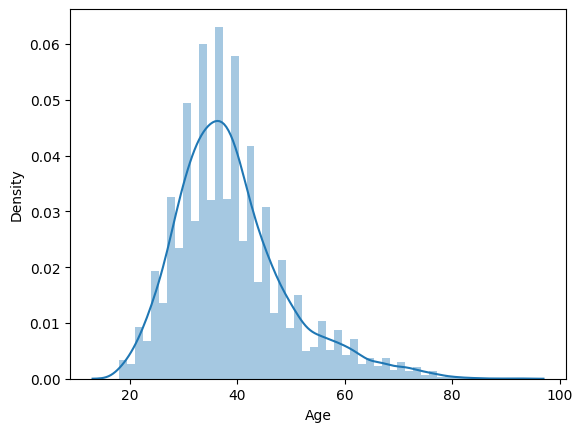

In [24]:
sns.distplot(df["Age"])

<ipython-input-25-6508ff102929>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CreditScore"])


<Axes: xlabel='CreditScore', ylabel='Density'>

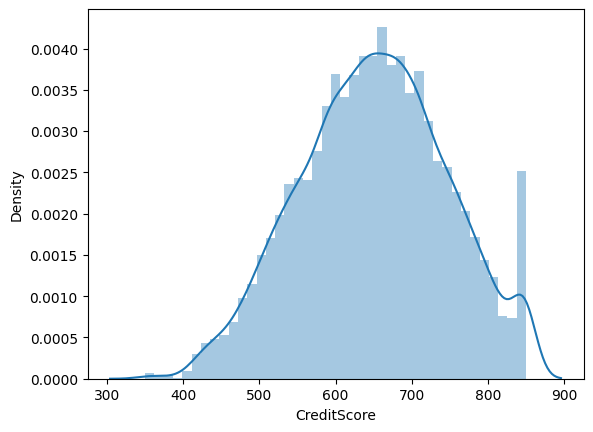

In [25]:
sns.distplot(df["CreditScore"])

<ipython-input-26-52450403a539>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Tenure"])


<Axes: xlabel='Tenure', ylabel='Density'>

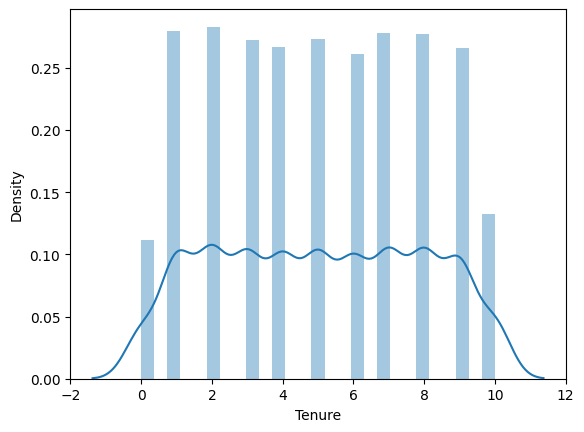

In [26]:
sns.distplot(df["Tenure"])

<ipython-input-27-14d55bfb6988>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Balance"])


<Axes: xlabel='Balance', ylabel='Density'>

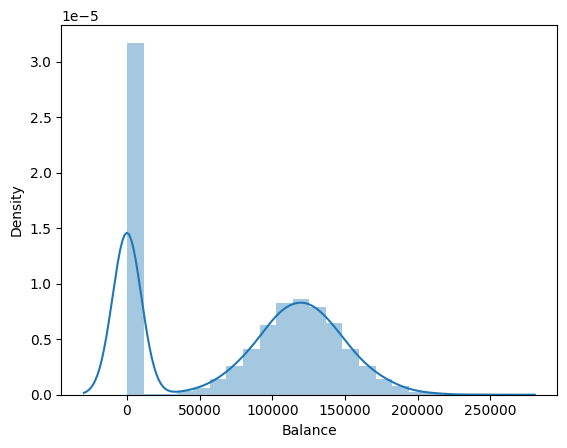

In [27]:
sns.distplot(df["Balance"])

<ipython-input-28-dbde108a733e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["NumOfProducts"])


<Axes: xlabel='NumOfProducts', ylabel='Density'>

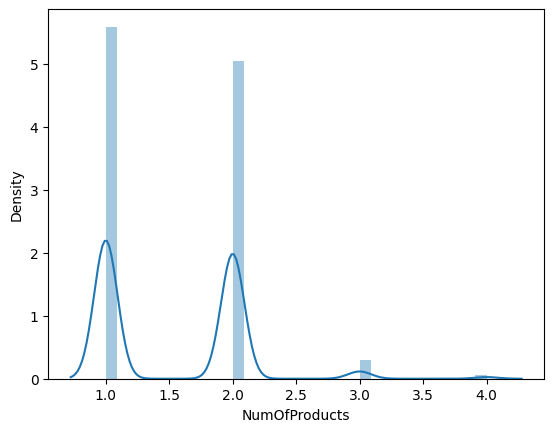

In [28]:
sns.distplot(df["NumOfProducts"])

<ipython-input-29-942d0c9ddc97>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["EstimatedSalary"])


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

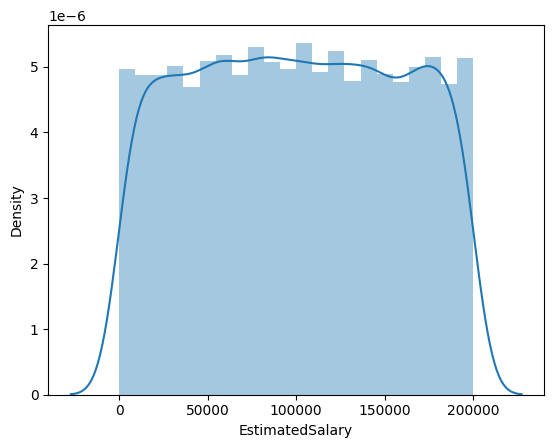

In [29]:
sns.distplot(df["EstimatedSalary"])

**Countplot**

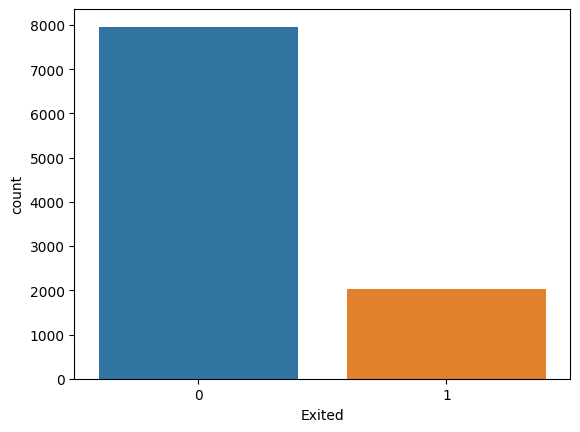

In [30]:
sns.countplot(x='Exited', data=df)
plt.show()

In [31]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

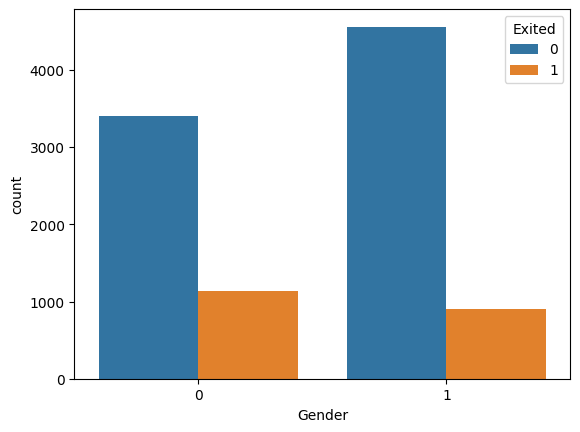

In [32]:
sns.countplot(x="Gender", hue="Exited", data=df)
plt.show()

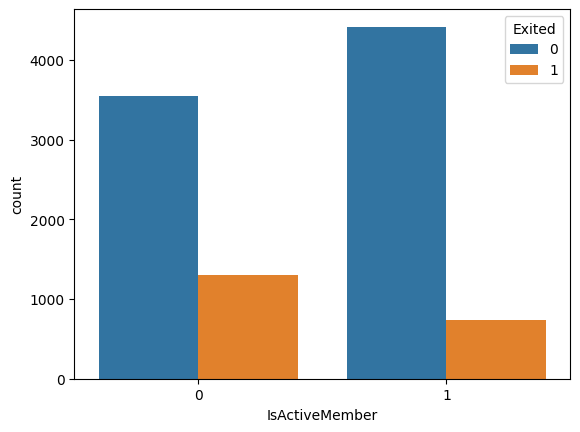

In [33]:
sns.countplot(x="IsActiveMember", hue="Exited", data=df)
plt.show()

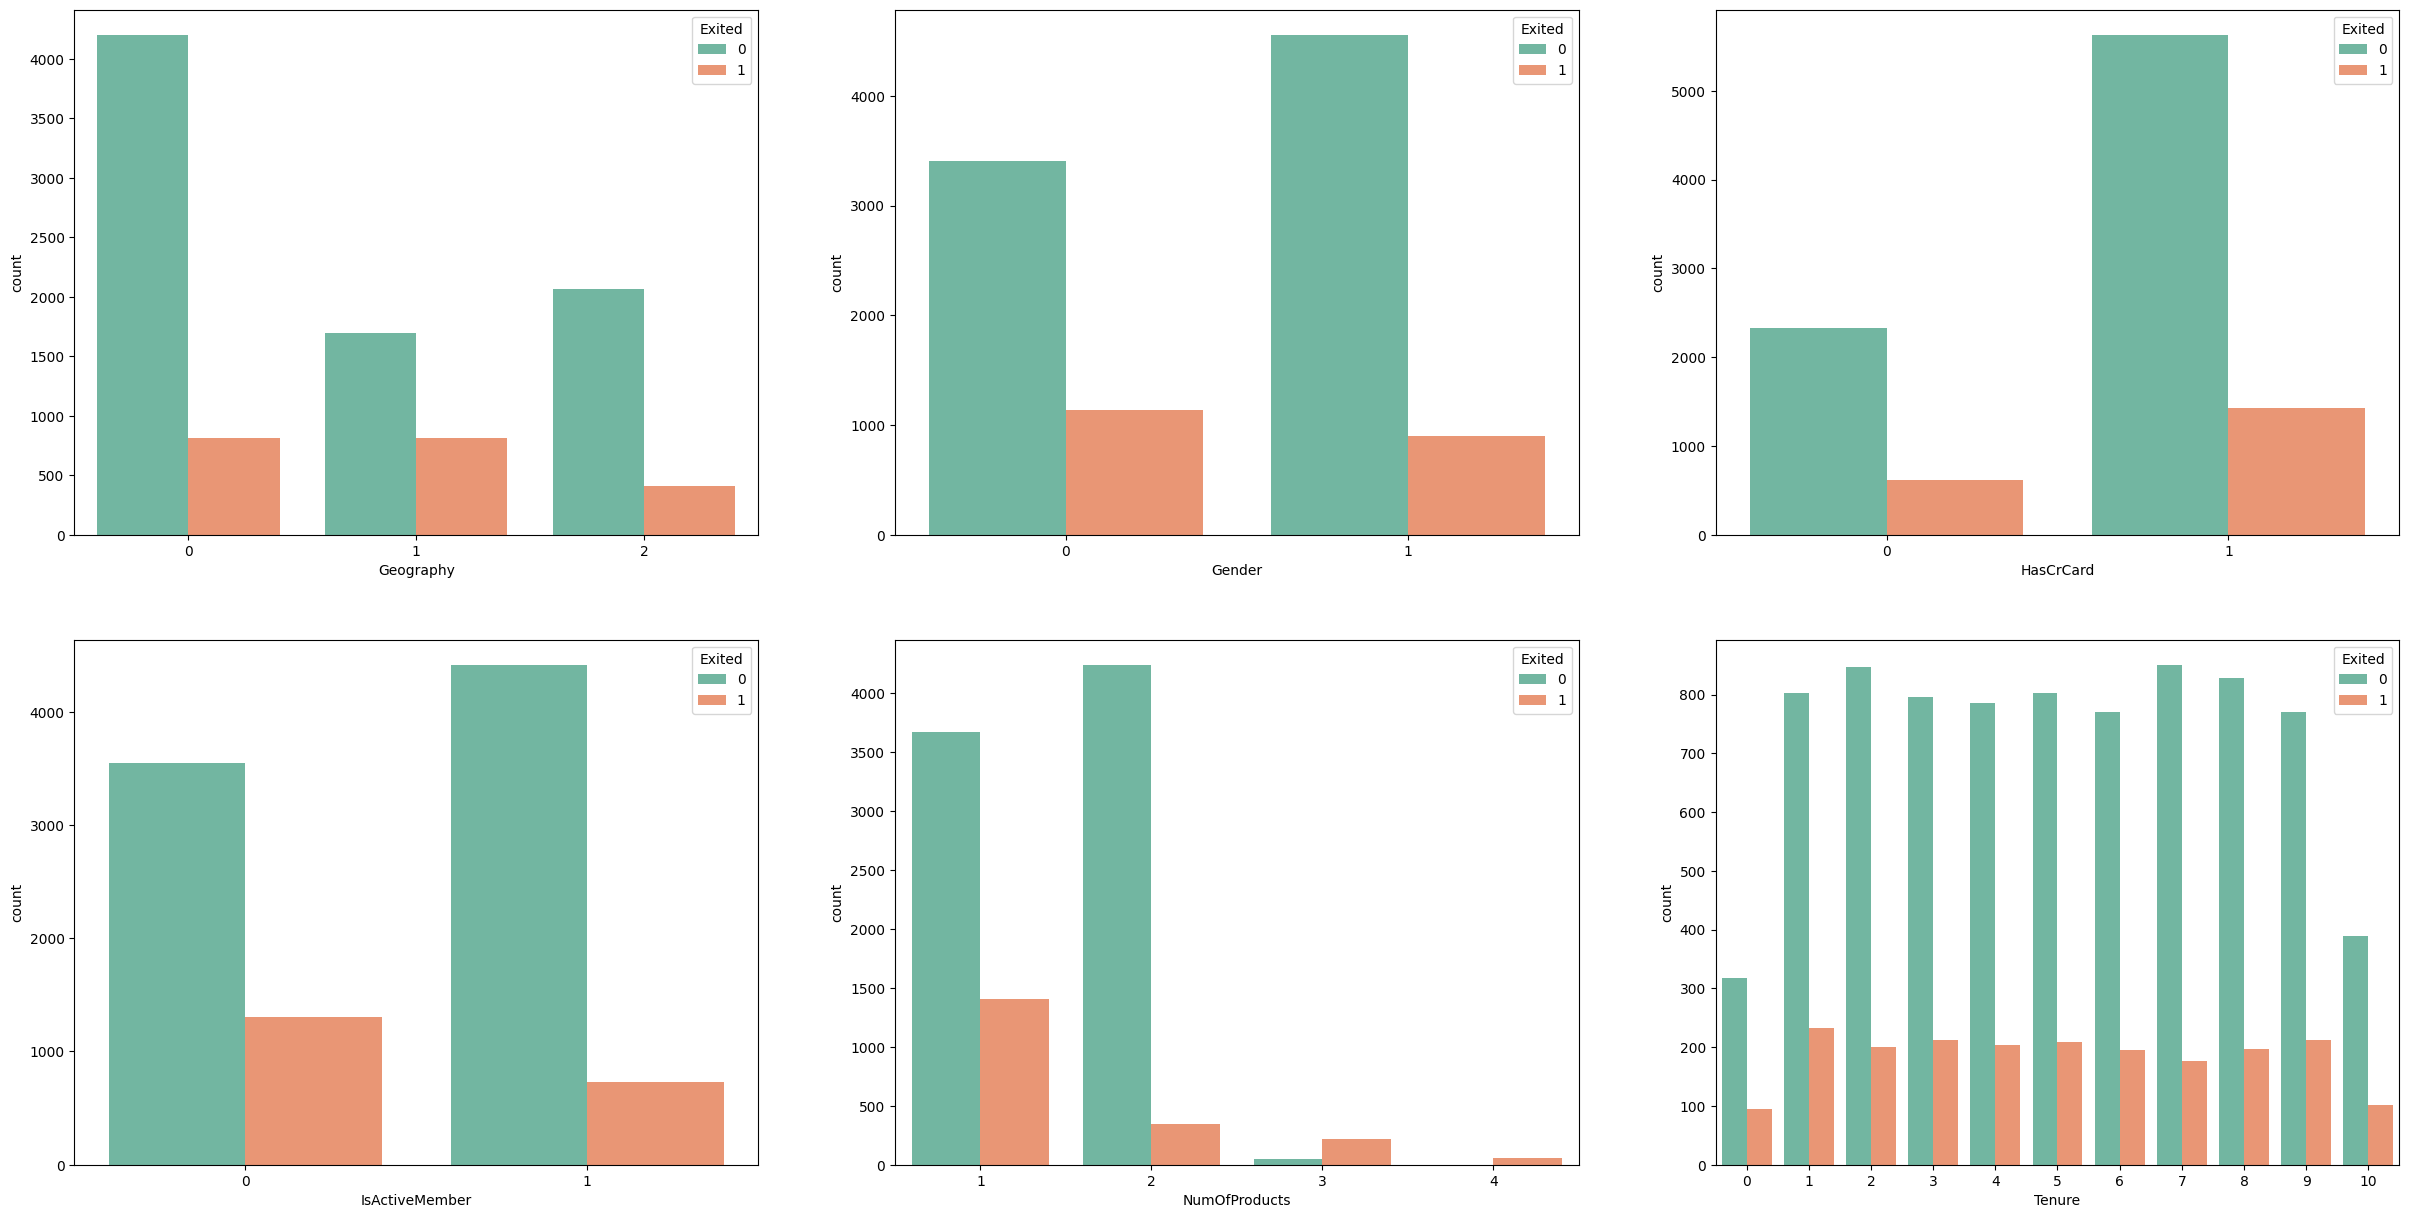

In [34]:
fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.countplot(x='Geography', hue='Exited', data=df, palette='Set2', ax=ax[0][0])
sns.countplot(x='Gender', hue='Exited', data=df, palette='Set2', ax=ax[0][1])
sns.countplot(x='HasCrCard', hue='Exited', data=df, palette='Set2', ax=ax[0][2])
sns.countplot(x='IsActiveMember', hue='Exited', data=df, palette='Set2', ax=ax[1][0])
sns.countplot(x='NumOfProducts', hue='Exited', data=df, palette='Set2', ax=ax[1][1])
sns.countplot(x='Tenure', hue='Exited', data=df, palette='Set2', ax=ax[1][2])

plt.show()

**Drop irrelevant attributes**

In [35]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)


In [36]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [37]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [38]:
from imblearn.over_sampling import SMOTE

**Balance unbalanced data**

In [39]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [40]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

**DATASET SPLITTING**

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.30,random_state=42)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(10000, 10) (11148, 10) (4778, 10)


In [43]:
print(y.shape, y_train.shape, y_test.shape)

(10000,) (11148,) (4778,)


**FEATURE SCALING**

In [44]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train = pd.DataFrame(X_train)
X_train.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.244335,0.430358,-0.843128,-0.199386,0.066010,0.704972,-0.732495,0.791365,-0.769639,-0.133125
1,0.837320,1.752018,1.186059,-0.501568,-1.042247,-1.329156,-0.732495,0.791365,-0.769639,1.637429
2,-0.593961,0.430358,-0.843128,0.908616,0.066010,0.302512,-0.732495,-1.263640,-0.769639,-0.954834
3,1.033985,1.752018,1.186059,-1.105933,-1.411666,0.761760,-0.732495,0.791365,-0.769639,0.359440
4,-1.009142,-0.891303,1.186059,0.002069,-1.042247,1.129531,1.014585,-1.263640,-0.769639,-1.326122


In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score

**DECISION TREE**

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [47]:
y_pred1 = dt.predict(X_test)

In [48]:
accuracy_score(y_test,y_pred1)

0.7881958978652156

In [49]:
precision_score(y_test,y_pred1)

0.7708164915117219

In [50]:
recall_score(y_test,y_pred1)

0.8107993197278912

In [51]:
f1_score(y_test,y_pred1)

0.7903025279734771

**RANDOM FOREST**

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
y_pred2 = rf.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred2)

0.8597739640016744

In [55]:
precision_score(y_test,y_pred2)

0.8495428096425602

In [56]:
recall_score(y_test,y_pred2)

0.8690476190476191

In [57]:
f1_score(y_test,y_pred2)

0.859184531315679

**KNN**

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [59]:
y_pred3 = knn.predict(X_test)

In [60]:
accuracy_score(y_test,y_pred3)

0.8197990791125994

In [61]:
precision_score(y_test,y_pred3)

0.7980807676929228

In [62]:
recall_score(y_test,y_pred3)

0.8486394557823129

In [63]:
f1_score(y_test,y_pred3)

0.8225839686791675

**LOGISTIC REGRESSION**

In [64]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [65]:
y_pred4 = log.predict(X_test)

In [66]:
accuracy_score(y_test,y_pred4)

0.7758476349937212

In [67]:
precision_score(y_test,y_pred4)

0.7606837606837606

In [68]:
recall_score(y_test,y_pred4)

0.7946428571428571

In [69]:
f1_score(y_test,y_pred4)

0.7772925764192139

In [70]:
accuracy=pd.DataFrame({'Models':['DecisionTree','RandomForest','KNN','LogisticRegression'],
                        'ACC':[accuracy_score(y_test,y_pred1),
                              accuracy_score(y_test,y_pred2),
                              accuracy_score(y_test,y_pred3),
                              accuracy_score(y_test,y_pred4)]})

In [71]:
accuracy

,Models,ACC
0,DecisionTree,0.788196
1,RandomForest,0.859774
2,KNN,0.819799
3,LogisticRegression,0.775848


In [72]:
precision=pd.DataFrame({'Models':['DecisionTree','RandomForest','KNN','LogisticRegression'],
                        'PR':[precision_score(y_test,y_pred1),
                              precision_score(y_test,y_pred2),
                              precision_score(y_test,y_pred3),
                              precision_score(y_test,y_pred4)]})

In [73]:
precision

,Models,PR
0,DecisionTree,0.770816
1,RandomForest,0.849543
2,KNN,0.798081
3,LogisticRegression,0.760684


In [74]:
recall=pd.DataFrame({'Models':['DecisionTree','RandomForest','KNN','LogisticRegression'],
                        'RV':[recall_score(y_test,y_pred1),
                              recall_score(y_test,y_pred2),
                              recall_score(y_test,y_pred3),
                              recall_score(y_test,y_pred4)]})

In [75]:
recall

,Models,RV
0,DecisionTree,0.810799
1,RandomForest,0.869048
2,KNN,0.848639
3,LogisticRegression,0.794643


In [76]:
F1=pd.DataFrame({'Models':['DecisionTree','RandomForest','KNN','LogisticRegression'],
                        'F1S':[f1_score(y_test,y_pred1),
                              f1_score(y_test,y_pred2),
                              f1_score(y_test,y_pred3),
                              f1_score(y_test,y_pred4)]})

In [77]:
F1

,Models,F1S
0,DecisionTree,0.790303
1,RandomForest,0.859185
2,KNN,0.822584
3,LogisticRegression,0.777293


In [78]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

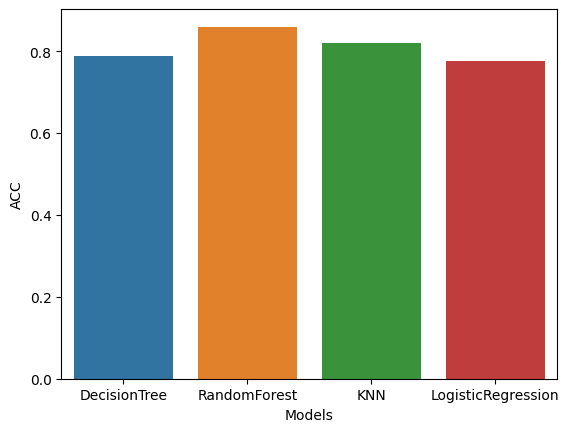

In [79]:
sns.barplot(x = 'Models', y = 'ACC', data = accuracy)

<Axes: xlabel='Models', ylabel='PR'>

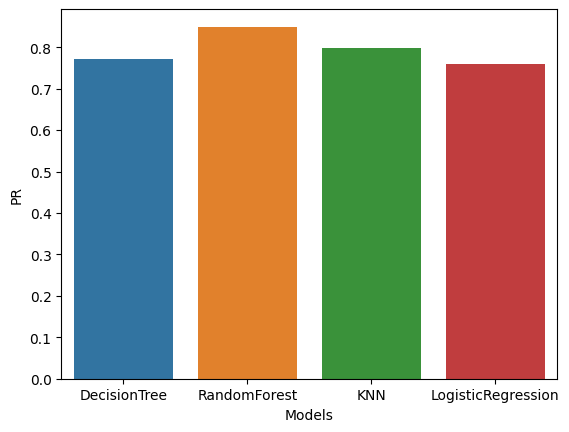

In [80]:
sns.barplot(x = 'Models', y = 'PR', data = precision)

<Axes: xlabel='Models', ylabel='RV'>

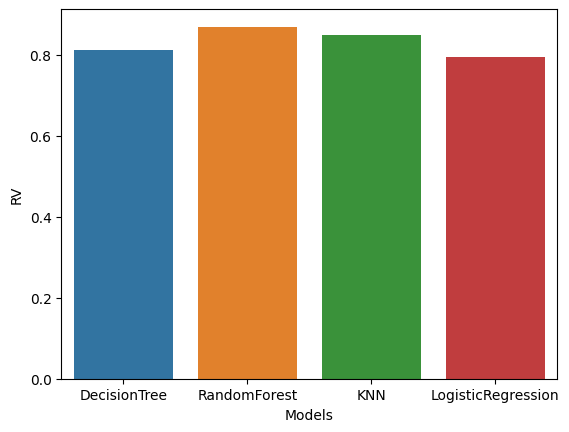

In [81]:
sns.barplot(x = 'Models', y = 'RV', data = recall)

<Axes: xlabel='Models', ylabel='F1S'>

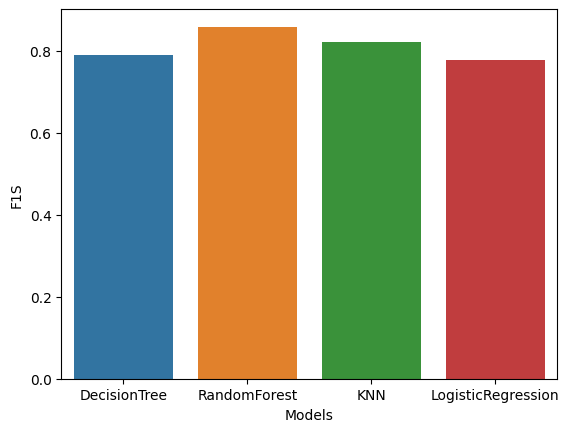

In [82]:
sns.barplot(x = 'Models', y = 'F1S', data = F1)

**CONFUSION METRICS**

In [83]:
# accuracy on training data
X_train_prediction = rf.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)

In [84]:
# accuracy on test data
X_test_prediction = rf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)

In [85]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Example true labels and predicted labels (replace these with your actual data)
true_labels = y_test
predicted_labels = X_test_prediction

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[2064  362]
 [ 308 2044]]


**SAVE MODEL**

In [86]:
X_res=sc.fit_transform(X_res)

In [87]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [88]:
import joblib

In [89]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [90]:
model = joblib.load('churn_predict_model')

In [91]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [92]:
model.predict([[619,2,0,42,2,0.0,0,0,0,101348.88]])

array([0])

In [93]:
model.predict([[608,1,0,41,1,83807.86,1,0,1,112542.58]])

array([0])

In [94]:
model.predict([[502,0,0,42,8,1596060.0,3,1,0,1113931.88]])

array([1])